Regression
=========  

What is `Scikit-learn`? <br>
Scikit-learn (commonly referred to as `sklearn`) is a Python library for machine learning. It provides a wide range of tools for supervised and unsupervised learning, including algorithms for classification, regression, clustering, dimensionality reduction, and more. Scikit-learn is built on top of NumPy, SciPy, and matplotlib, and it's designed for ease of use, scalability, and consistency.

How is it different from Statsmodels?

Key Decision Factors:
1. **Purpose:**
   - Prediction → sklearn
   - Statistical inference → statsmodels
2. **Dataset Size:**
   - Large datasets → sklearn
   - Small/medium datasets → either
3. **Requirements:**
   - ML pipeline integration → sklearn
   - Statistical reporting → statsmodels
4. **Workflow:**
   - Complex ML workflows → sklearn
   - Simple statistical analysis → statsmodels


NOTE: These aren't mutually exclusive - you can use both in the same project for different purposes. For example, use statsmodels for initial statistical analysis and sklearn for the final prediction model.


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

## Load Data

In [3]:
df = pd.read_csv('admission2_mod.csv')
out_of_sample = pd.read_csv('hold_out_sample.csv')

In [4]:
# converting the admit status into boolean
df['De']=df['De']=='admit'

In [5]:
# rename De column to admit
df.rename(columns={'De':'admit'}, inplace=True)

## Statsmodels - Logit

Optimization terminated successfully.
         Current function value: 0.221269
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                   59
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                  0.6791
Time:                        11:59:23   Log-Likelihood:                -13.055
converged:                       True   LL-Null:                       -40.684
Covariance Type:            nonrobust   LLR p-value:                 1.002e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.4498      8.452     -3.366      0.001     -45.014     -11.885
GPA            3.4016      1.

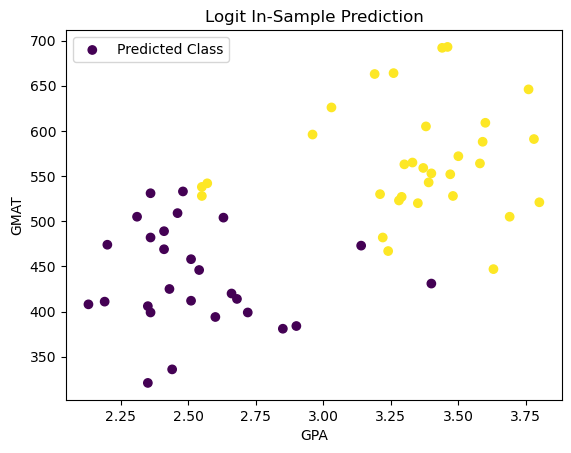

In [6]:
# Replace 'De', 'GPA', and 'GMAT' with actual column names in your dataset
dependent_var = 'admit'  # Binary dependent variable
independent_vars = ['GPA', 'GMAT']

# Split data into predictors (X) and target (y)
X = df[independent_vars]
y = df[dependent_var]

# Add a constant term to the predictors (intercept)
X = sm.add_constant(X)

# Train logistic regression model
logit_model = sm.Logit(y, X).fit()

# Display model summary (coefficients, p-values, etc.)
print(logit_model.summary())

# In-sample predictions
in_sample_prob = logit_model.predict(X)
in_sample_class = (in_sample_prob > 0.5).astype(int)

# Evaluation: In-sample performance
auc_in_sample = roc_auc_score(y, in_sample_prob)
print(f"In-sample AUC: {auc_in_sample}")

# Plot: In-sample predictions
plt.scatter(df["GPA"], df["GMAT"], c=in_sample_class, cmap="viridis", label="Predicted Class")
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Logit In-Sample Prediction")
plt.legend()
plt.show()

Out-of-sample AUC: 1.0


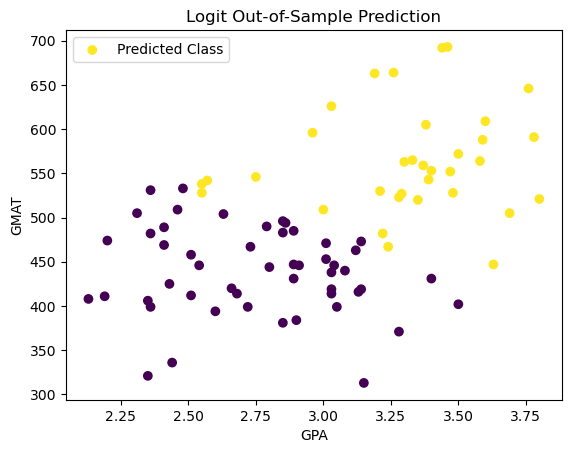

In [7]:
# # Out-of-sample (replace with your actual out-of-sample data)
# Assuming out_of_sample_df is available
out_of_sample_X = out_of_sample[independent_vars]
out_of_sample_y = out_of_sample[dependent_var]
out_of_sample_X = sm.add_constant(out_of_sample_X)

# Out-of-sample predictions
out_of_sample_prob = logit_model.predict(out_of_sample_X)
out_of_sample_class = (out_of_sample_prob > 0.5).astype(int)

# Uncomment for out-of-sample evaluation
auc_out_of_sample = roc_auc_score(out_of_sample_y, out_of_sample_prob)
print(f"Out-of-sample AUC: {auc_out_of_sample}")

# Uncomment for Out-of-sample plot
plt.scatter(out_of_sample["GPA"], out_of_sample["GMAT"], c=out_of_sample_class, cmap="viridis", label="Predicted Class")
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Logit Out-of-Sample Prediction")
plt.legend()
plt.show()


In [8]:
# Log-likelihood of the fitted model
log_likelihood_full = logit_model.llf

# Log-likelihood of the null model (intercept-only model)
log_likelihood_null = logit_model.llnull

# McFadden's Pseudo R-squared
mcfadden_r2 = 1 - (log_likelihood_full / log_likelihood_null)
print(f"McFadden's Pseudo R-squared: {mcfadden_r2}")


McFadden's Pseudo R-squared: 0.6791118158802723


## Sklearn - Logit

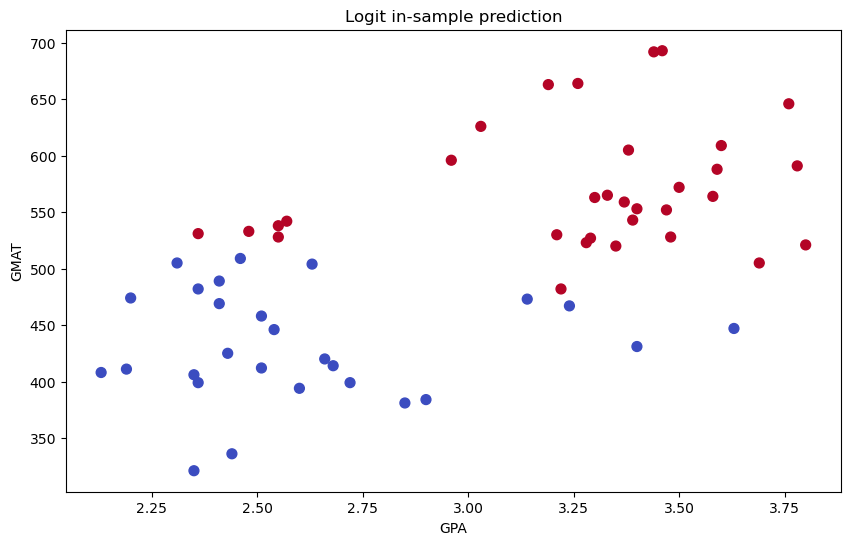

Pseudo-R2: 0.646701917055688


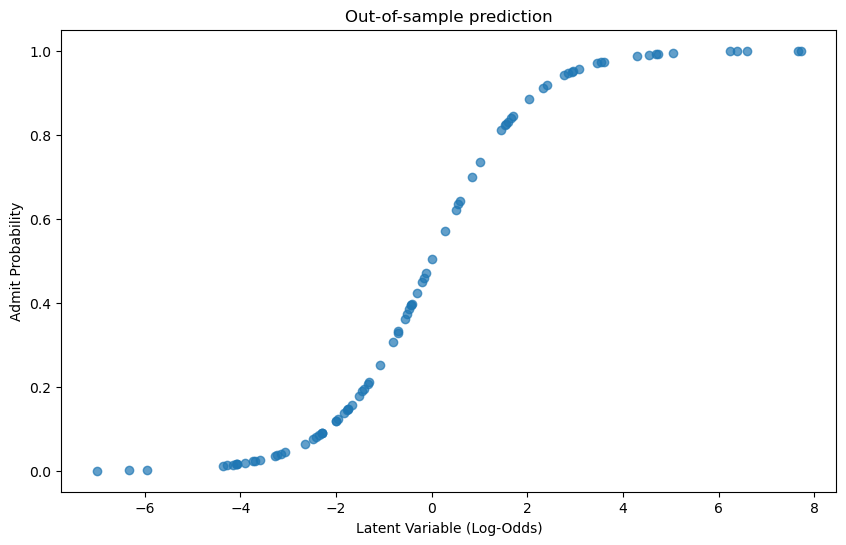

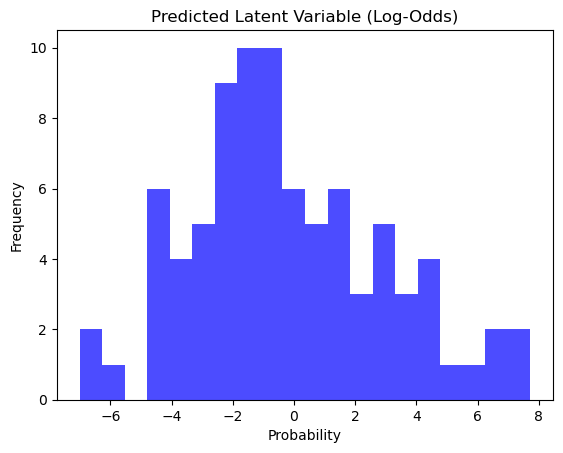

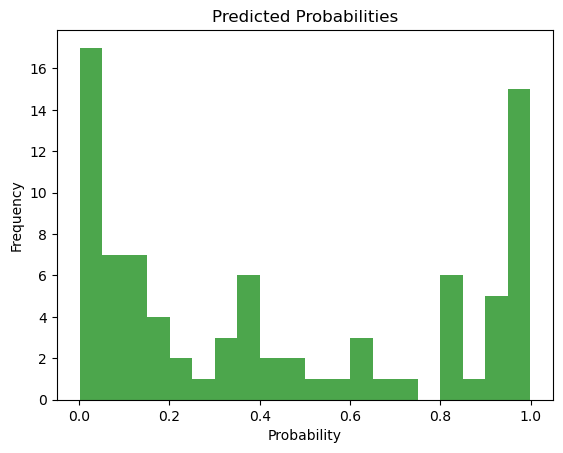

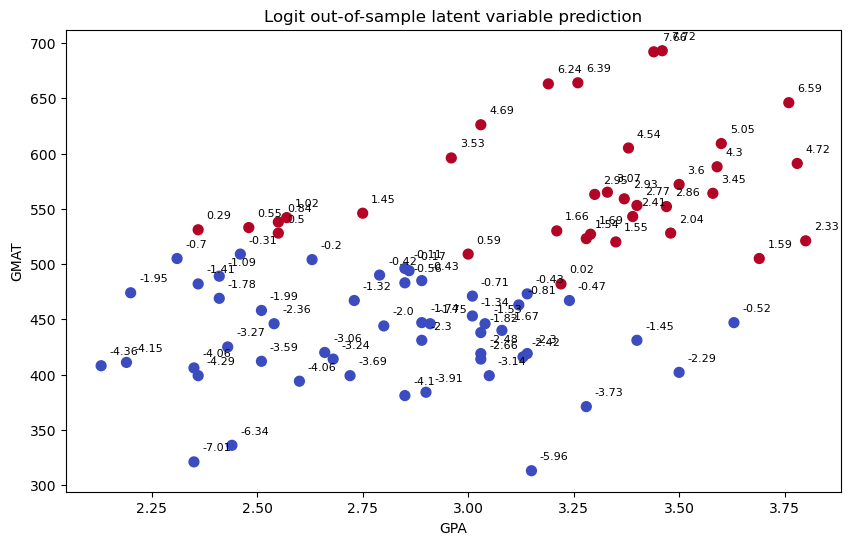

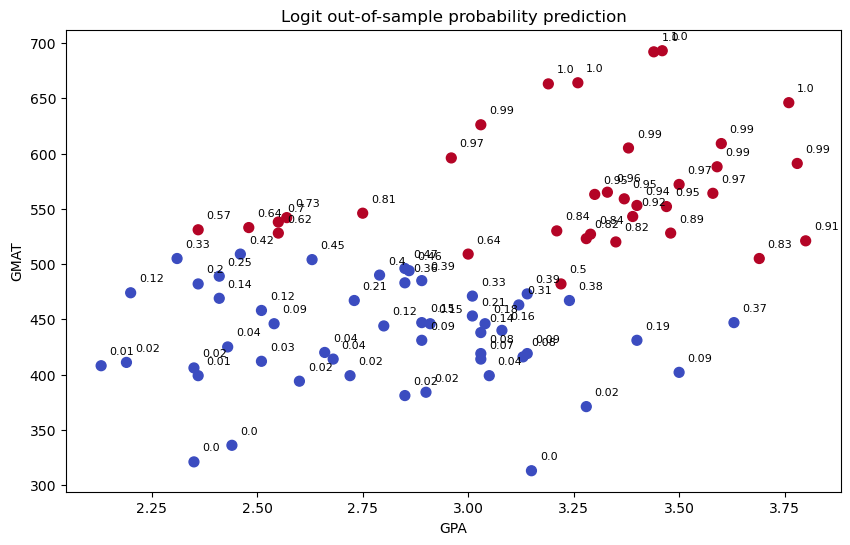

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, PoissonRegressor
from sklearn.metrics import log_loss, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression Model
# Initialize logistic regression model with increased iterations to ensure convergence
logit = LogisticRegression(max_iter=1000)

# Prepare input (features) and output (target)
# Prepare feature matrix X (GPA and GMAT scores) and target variable y (admission status)
X = df[['GPA', 'GMAT']]
y = df['admit']  # Dependent variable

# Fit the model
logit.fit(X, y)

# In-sample predictions
# Generate predictions for training data

# Get raw scores (log-odds) before sigmoid transformation
pr = logit.decision_function(X)  # Predict latent variable (log-odds) 
prob = logit.predict_proba(X)[:, 1]  # Get probability of admission (second column for positive class)

# Visualization 1: In-sample predictions
# Plot in-sample prediction
plt.figure(figsize=(10, 6))
plt.scatter(df['GPA'], df['GMAT'], c=(pr > 0).astype(int), cmap="coolwarm", s=50)
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Logit in-sample prediction")
plt.show()

# Calculate Pseudo R-squared using log loss
null_model = log_loss(y, [np.mean(y)] * len(y))  # Null model log-loss
full_model = log_loss(y, prob)  # Fitted model log-loss
pseudo_r2 = 1 - (full_model / null_model)
print("Pseudo-R2:", pseudo_r2)

# Out-of-sample prediction
# Assuming out_of_sample is a pandas DataFrame with similar structure to df
pr_out = logit.decision_function(out_of_sample[['GPA','GMAT']]) # Raw scores
prob_out = logit.predict_proba(out_of_sample[['GPA','GMAT']])[:, 1]  # Probabilities

# Visualization 2: Relationship between log-odds and probabilities
# Plot latent variable vs probabilities
plt.figure(figsize=(10, 6))
plt.scatter(pr_out, prob_out, alpha=0.7)
plt.xlabel("Latent Variable (Log-Odds)")
plt.ylabel("Admit Probability")
plt.title("Out-of-sample prediction")
plt.show()

# Visualization 3 & 4: Distribution of predictions
# # Histogram of log-odds scores
plt.hist(pr_out, bins=20, alpha=0.7, color='blue')
plt.title("Predicted Latent Variable (Log-Odds)")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

# Histogram of probabilities
plt.hist(prob_out, bins=20, alpha=0.7, color='green')
plt.title("Predicted Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

# Visualization 5: Out-of-sample predictions with log-odds scores
# Out-of-sample latent variable prediction
plt.figure(figsize=(10, 6))
plt.scatter(out_of_sample['GPA'], out_of_sample['GMAT'], c=(pr_out > 0).astype(int), cmap="coolwarm", s=50)
for i, txt in enumerate(np.round(pr_out, 2)):
    plt.text(out_of_sample['GPA'].iloc[i] + 0.02, out_of_sample['GMAT'].iloc[i] + 10, txt, fontsize=8)
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Logit out-of-sample latent variable prediction")
plt.show()

# Visualization 6: Out-of-sample predictions with probability scores
# Out-of-sample probability prediction
plt.figure(figsize=(10, 6))
plt.scatter(out_of_sample['GPA'], out_of_sample['GMAT'], c=(prob_out > 0.5).astype(int), cmap="coolwarm", s=50)
for i, txt in enumerate(np.round(prob_out, 2)):
    plt.text(out_of_sample['GPA'].iloc[i] + 0.02, out_of_sample['GMAT'].iloc[i] + 10, txt, fontsize=8)
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.title("Logit out-of-sample probability prediction")
plt.show()
